In [1]:
import pdb
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("../data/interum/top_genres.csv")

## Subset numerical data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107973 entries, 0 to 107972
Data columns (total 26 columns):
Name                      107972 non-null object
Danceability              107973 non-null float64
Energy                    107973 non-null float64
Key                       107973 non-null float64
Loudness                  107973 non-null float64
Mode                      107973 non-null float64
Speechness                107973 non-null float64
Acousticness              107973 non-null float64
Instrumentalness          107973 non-null float64
Liveness                  107973 non-null float64
Valence                   107973 non-null float64
Tempo                     107973 non-null float64
Type                      107973 non-null object
ID                        107973 non-null object
Uri                       107973 non-null object
Ref_Track                 107973 non-null object
URL_features              107973 non-null object
Duration_ms               107973 non-null flo

In [4]:
numerical = data[[
    "Danceability",
    "Energy",
    "Loudness",
    "Speechness",
    "Acousticness",
    "Instrumentalness",
    "Liveness",
    "Valence",
    "Tempo",
    "Duration_ms",
    
]]

In [5]:
numerical.describe()

,Danceability,Energy,Loudness,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
count,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,107973.000000,1.079730e+05
mean,0.550963,0.642299,-8.671973,0.084604,0.279791,0.241153,0.194109,0.465391,121.812796,2.549906e+05
std,0.184471,0.249686,4.916737,0.102570,0.328708,0.358198,0.164054,0.267500,29.113351,1.285168e+05
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.576000e+03
25%,0.427000,0.477000,-10.570000,0.036100,0.008130,0.000002,0.095100,0.239000,99.946000,1.909600e+05
50%,0.564000,0.683000,-7.479000,0.048500,0.114000,0.001990,0.125000,0.453000,120.970000,2.299600e+05
75%,0.691000,0.851000,-5.397000,0.083900,0.513000,0.557000,0.247000,0.681000,139.951000,2.878930e+05
max,0.988000,1.000000,5.056000,0.966000,0.996000,0.999000,1.000000,1.000000,248.066000,5.949886e+06


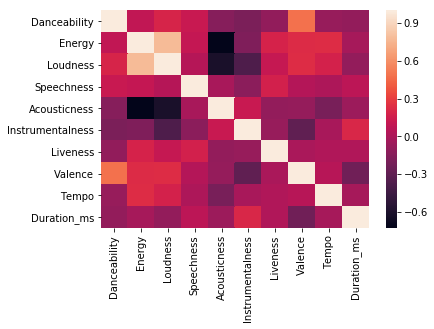

In [6]:
sns.heatmap(numerical.corr())

In [7]:
def plot_scatter_relationship(data, x, y="Energy"):
    plt.scatter(x=data[x], y=data[y], alpha=0.1)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs. {y}")

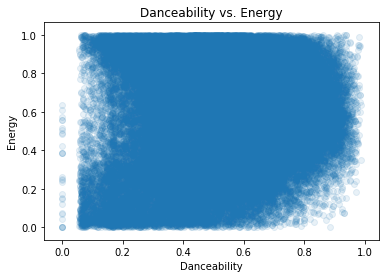

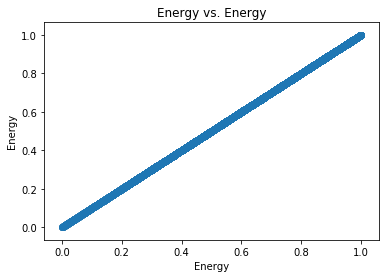

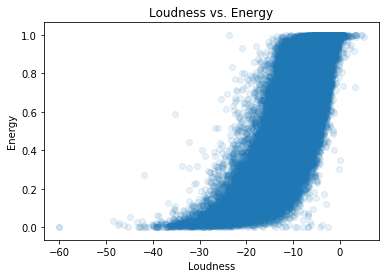

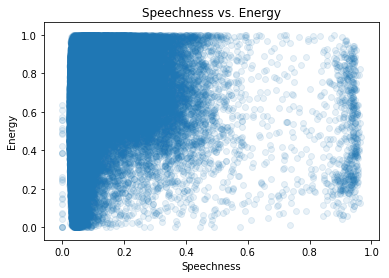

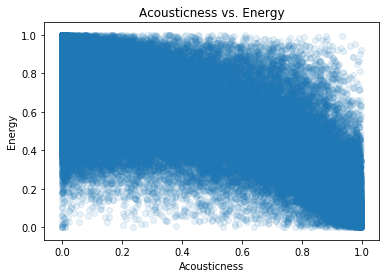

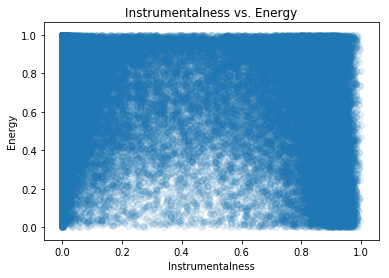

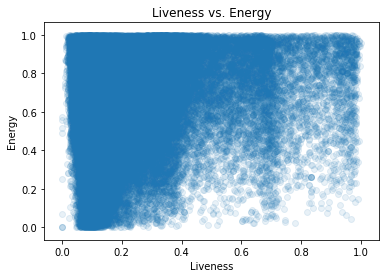

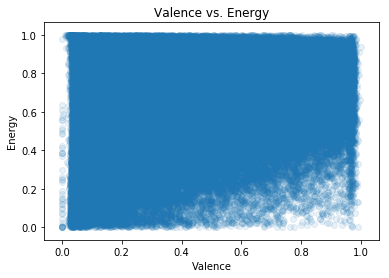

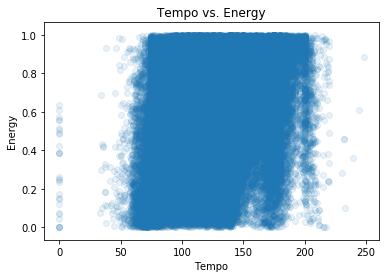

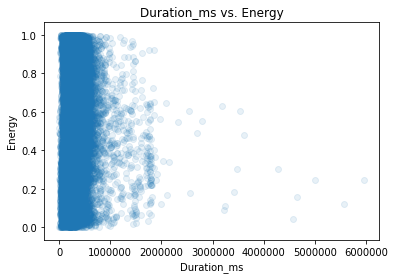

In [8]:
for variable in list(numerical.columns):
    plot_scatter_relationship(numerical, variable)
    plt.show()

In [9]:
def plot_distributions(data, x):
    scaler = MinMaxScaler()
    sns.distplot(a=scaler.fit(np.array(data[x]).reshape(-1,1)).transform(np.array(data[x]).reshape(-1,1)), bins=500)
    plt.title(x)
    plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

def log_variable(series):
    new_vals = []
    for v in series:
        
        if v == 0:
            new_vals.append(0)
        else:
            new_vals.append(np.log(v))
    return new_vals
        

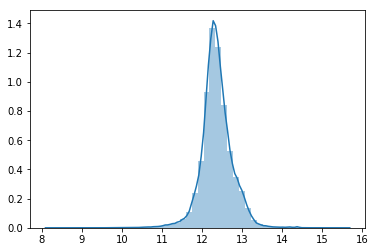

In [11]:
sns.distplot(log_variable(numerical.Duration_ms))

Logs with

```
from sklearn.preprocessing import StandardScaler

def log_variable(series):
    new_vals = []
    for v in series:
        
        if v == 0:
            new_vals.append(0)
        else:
            new_vals.append(np.log(v))
    return new_vals
```

* Duration_ms
* Liveness

In [12]:
vanilla = data[[
    "Danceability",
    "Energy",
    "Key",
    "Loudness",
    "Mode",
    "Speechness",
    "Acousticness",
    "Instrumentalness",
    "Liveness",
    "Valence",
    "Tempo",
    "Duration_ms",
    'Super_genre',
    'time_signature'
]]
vanilla.head()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Super_genre,time_signature
0,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,metal,4.0
1,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,metal,4.0
2,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,metal,4.0
3,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,metal,4.0
4,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,metal,4.0


In [13]:
vanilla['log_duration'] = np.log(vanilla.Duration_ms)

/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
vanilla.Mode = vanilla.Mode.astype(str)
vanilla.Key = vanilla.Key.astype(str)
vanilla.time_signature = vanilla.time_signature.astype(str)

/home/allan/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
vanilla=pd.get_dummies(vanilla)
vanilla.head()

,Danceability,Energy,Loudness,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,...,Super_genre_step,Super_genre_swing,Super_genre_synth,Super_genre_techno,Super_genre_worship,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,0.624,0.857,-6.250,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,...,0,0,0,0,0,0,0,0,1,0
1,0.517,0.916,-4.933,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,...,0,0,0,0,0,0,0,0,1,0
2,0.251,0.894,-4.103,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,...,0,0,0,0,0,0,0,0,1,0
3,0.469,0.743,-5.570,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,...,0,0,0,0,0,0,0,0,1,0
4,0.487,0.952,-4.429,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
def adjusted_r_squared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [ ]:
# y = vanilla.Energy
# predictors = vanilla.drop('Energy', axis=1)



# linreg = LinearRegression()
# for i in range(1,57):
#     print("\n\n")
#     print('Iteration', i)
#     selector = RFE(linreg, n_features_to_select=i)

#     selector = selector.fit(X=predictors, y=y)

#     print("Which columns were kept:\t", selector.support_)
#     print("Rankings of the columns:\t", selector.ranking_)
#     print("The coefficients:\t\t", selector.estimator_.coef_)
#     print("The intercept:\t\t\t", selector.estimator_.intercept_)
#     r_squared = selector.score(predictors,y)
#     adj_r_squared = adjusted_r_squared(r_squared, vanilla.shape[0], i)
#     print("R Squared\t\t", r_squared)
#     print("Adjusted R Squared\t", adj_r_squared)

In [18]:
# Set dependent and independent variables
y = vanilla.Energy
X = vanilla.drop('Energy', axis=1)
# Get dummy variables and add constant for intercept
X = sm.add_constant(X)

# Split data 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.7)

# fit and summarize your model
model = sm.OLS(y,X).fit()
model.summary()

/home/allan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     6754.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:09:00   Log-Likelihood:                 75568.
No. Observations:              107973   AIC:                        -1.510e+05
Df Residuals:                  107919   BIC:                        -1.505e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3737      0.013     29.503      0.000       0.349       0.399
Danceability             -0.1690      0.003    -64.778      0.000      -0.174      -0.164
Loudness                  0.0279      0.000    264.865      0.000       0.028       0.028
Speechness                0.2226      0.004     56.360      0.000       0.215       0.230
Acousticness             -0.2746      0.002   -179.616      0.000      -0.278      -0.272
Instrumentalness          0.0722      0.001     59.279      0.000       0.070       0.075
Liveness                  0.1051      0.002     45.381      0.000       0.101       0.110
Valence                   0.1584      0.002     91.672      0.000       0.155       0.162
Tempo                     0.0003   1.31e-05     24.151      0.000       0.000       0.000
Duration_ms           -3.355e-08    5.9e-09     -5.686      0.000   -4.51e-08    -2.2e-08
log_duration              0.0175      0.002      8.976      0.000       0.014       0.021
Key_0.0                   0.0268      0.001     17.918      0.000       0.024       0.030
Key_1.0                   0.0368      0.002     23.282      0.000       0.034       0.040
Key_10.0                  0.0307      0.002     17.737      0.000       0.027       0.034
Key_11.0                  0.0355      0.002     21.659      0.000       0.032       0.039
Key_2.0                   0.0297      0.002     19.472      0.000       0.027       0.033
Key_3.0                   0.0245      0.002     10.918      0.000       0.020       0.029
Key_4.0                   0.0312      0.002     19.048      0.000       0.028       0.034
Key_5.0                   0.0269      0.002     16.403      0.000       0.024       0.030
Key_6.0                   0.0338      0.002     19.578      0.000       0.030       0.037
Key_7.0                   0.0330      0.002     21.985      0.000       0.030       0.036
Key_8.0                   0.0328      0.002     18.544      0.000       0.029       0.036
Key_9.0                   0.0319      0.002     20.926      0.000       0.029       0.035
Mode_0.0                  0.1885      0.006     29.643      0.000       0.176       0.201
Mode_1.0                  0.1852      0.006     29.246      0.000       0.173       0.198
Super_genre_blues         0.0016      0.003      0.594      0.553      -0.004       0.007
Super_genre_classical     0.0464      0.004     12.306      0.000       0.039       0.054
Super_genre_country      -0.0004      0.004     -0.100      0.920      -0.008       0.007
Super_genre_dance         0.0576      0.005     12.353      0.000       0.048       0.067
Super_genre_disco        -0.0065      0.008     -0.789      0.430      -0.023       0.010
Super_genre_edm           0.0327      0.007      4.916      0.000       0.020       0.046
Super_genre_elect      

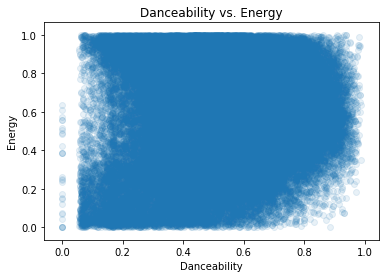

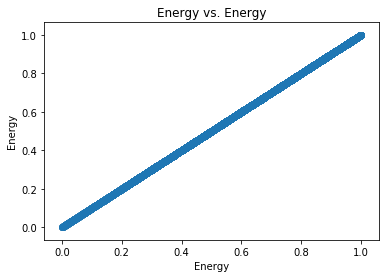

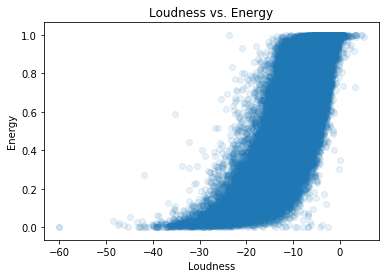

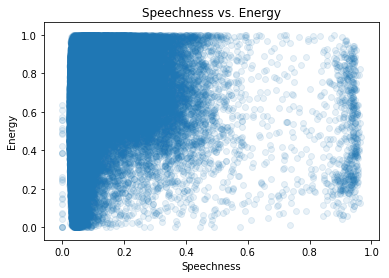

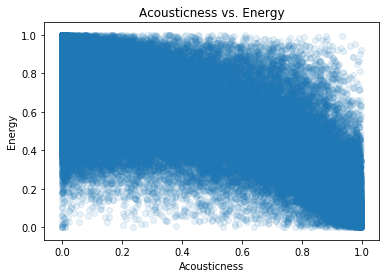

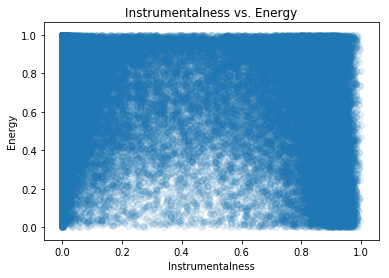

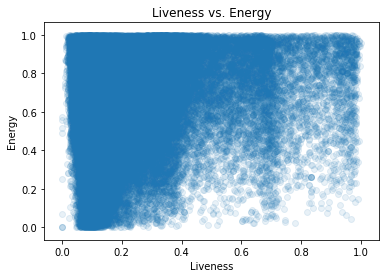

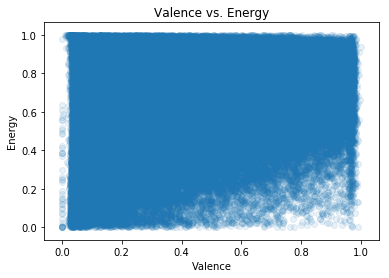

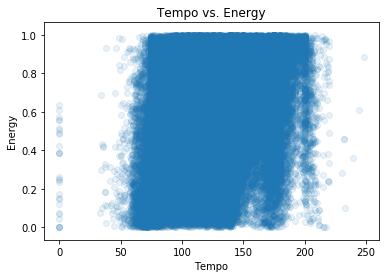

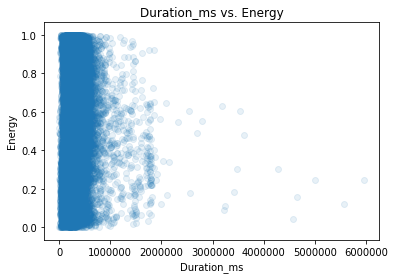

In [19]:
for variable in list(numerical.columns):
    plot_scatter_relationship(numerical, variable)
    plt.show()

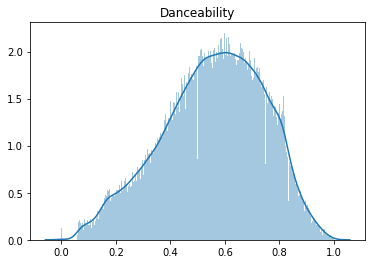

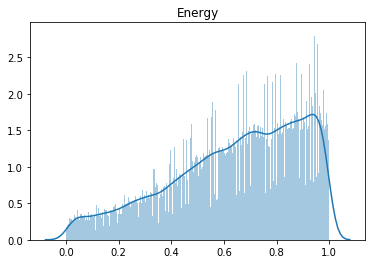

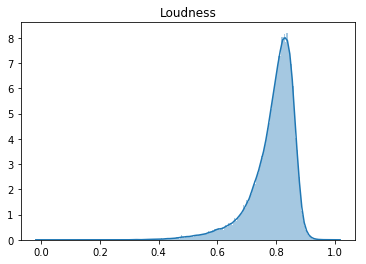

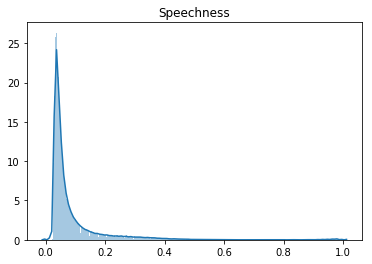

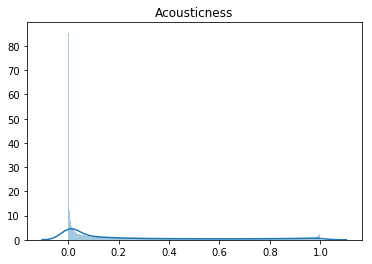

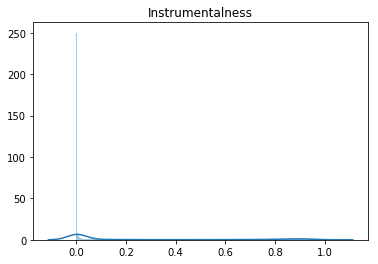

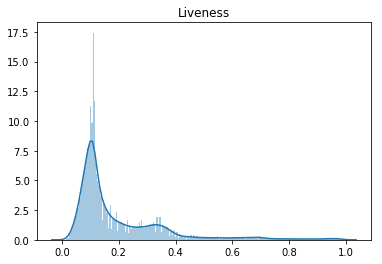

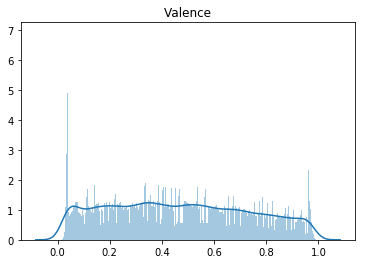

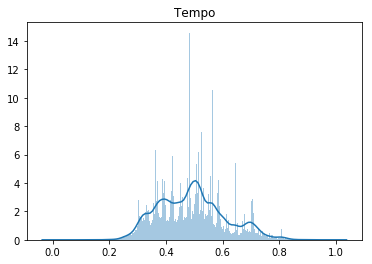

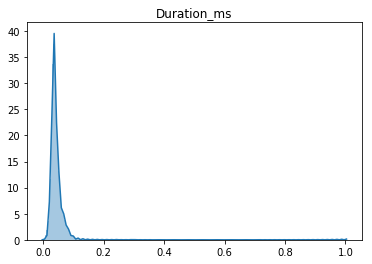

In [20]:
for variable in list(numerical.columns):
    plot_distributions(numerical, variable)